# **ESTUDO DE CASO - Análise descritiva de dados de futebol**

Victor Hugo de Paula

## **Introdução**

O futebol, como esporte de alto impacto global, tem se beneficiado crescentemente de análises estatísticas para aprimorar estratégias táticas, avaliar desempenho de jogadores e otimizar resultados de equipes. Neste contexto, a presente análise se propõe a investigar o impacto das estatísticas individuais de jogadores, como passes, duelos vencidos e gols esperados, bem como métricas coletivas, como posse de bola e eficiência de finalização, no sucesso competitivo de cinco clubes brasileiros: Flamengo, Palmeiras, São Paulo, Corinthians e Ituano. Esses times, que variam em porte, recursos e tradição, oferecem uma oportunidade única para comparar padrões de desempenho em diferentes torneios e condições de jogo (casa ou fora).

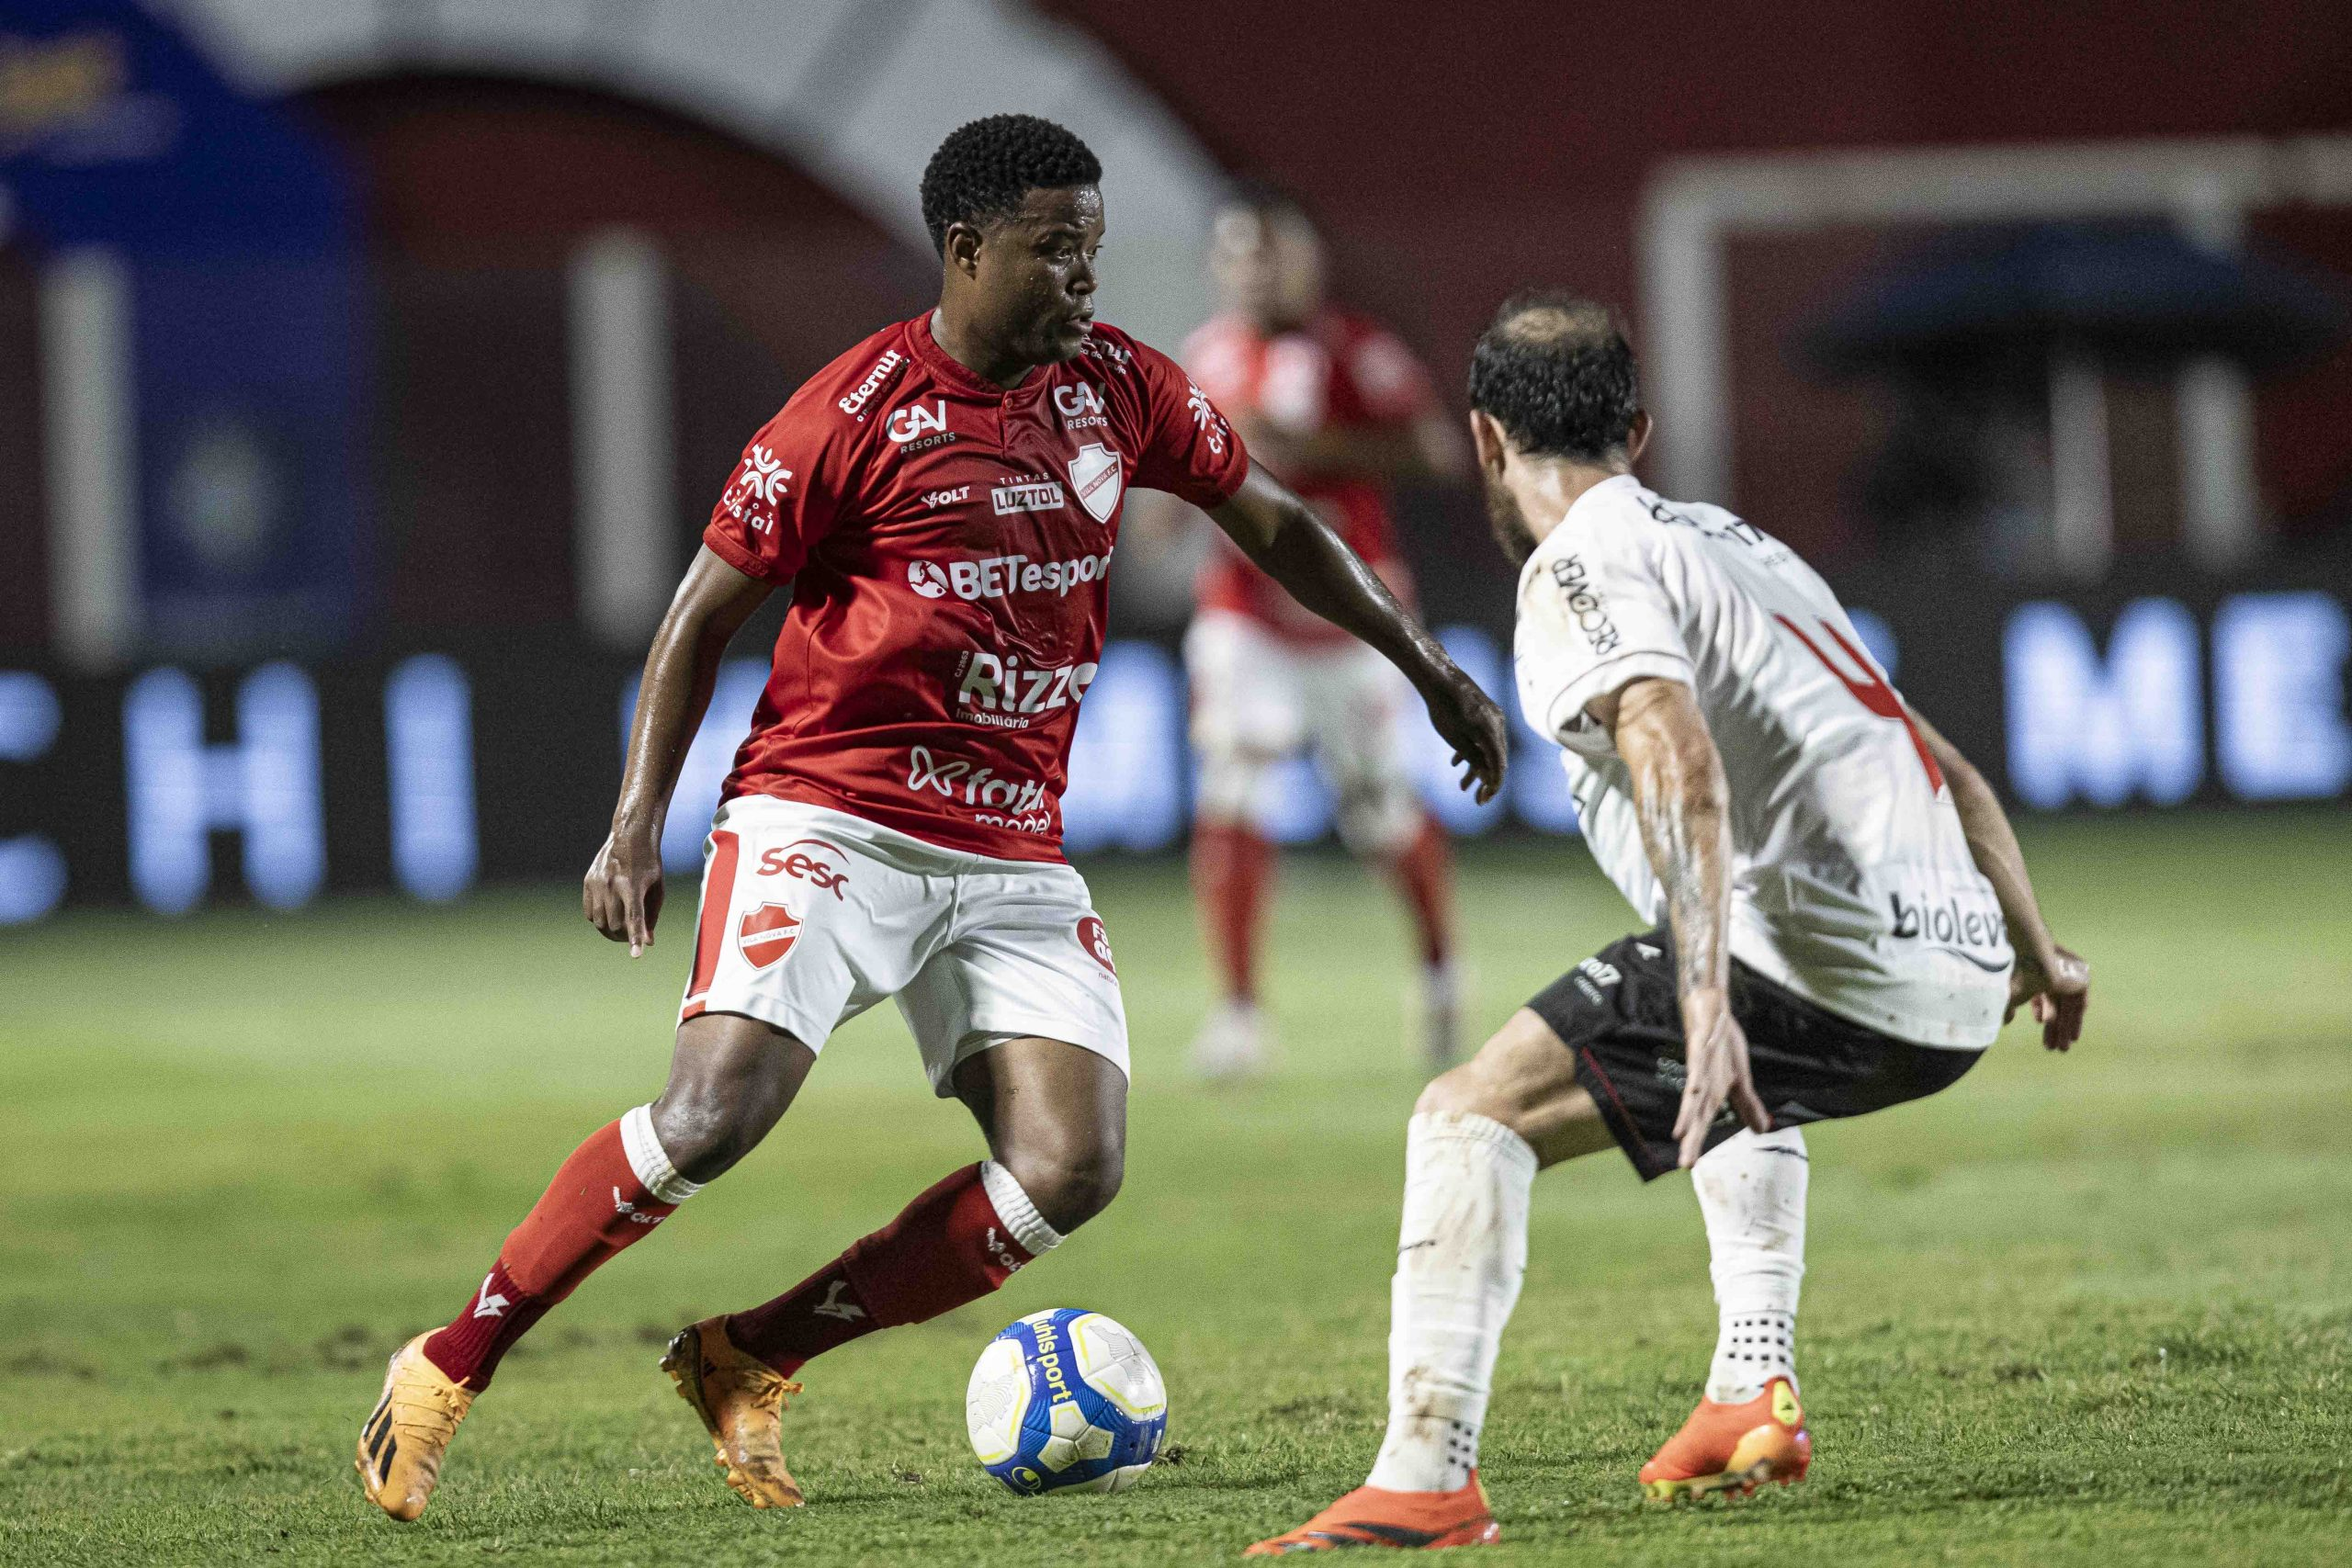

A relevância desta pesquisa reside na capacidade de identificar quais métricas estatísticas são mais determinantes para o resultado de partidas (vitória, empate ou derrota), fornecendo insights acionáveis para técnicos, analistas e gestores esportivos. Além disso, a inclusão de um clube de menor expressão, como o Ituano, ao lado de gigantes do futebol brasileiro, permite explorar como estratégias e desempenhos variam em contextos de diferentes recursos financeiros e estruturais.

Por meio de uma abordagem baseada em dados, utilizando técnicas de análise exploratória, testes estatísticos e modelagem preditiva, este estudo busca contribuir para a compreensão do desempenho esportivo no futebol brasileiro, oferecendo uma base sólida para tomadas de decisão estratégicas no esporte.

## **Importando os dados**

In [ ]:
import pandas as pd
import glob

# Caminho para os arquivos CSV
caminho_pasta = "dados/"
padrao_arquivo = '*.csv'
arquivos_csv = glob.glob(f'{caminho_pasta}/{padrao_arquivo}')

# Lista para armazenar os DataFrames
lista_dfs = []

# Importar e armazenar todos os CSVs na lista
for arquivo in arquivos_csv:
    df_temp = pd.read_csv(arquivo, sep=',')
    lista_dfs.append(df_temp)

# Concatenar todos em um único DataFrame
df = pd.concat(lista_dfs, ignore_index=True, sort=False)

df.head(3)

,time_alvo,ano,jogo,home_or_away,home_team,away_team,stadium,tournament,home_score,away_score,...,statistics_penalty_shootout_goal,statistics_clearance_off_line,statistics_error_lead_to_a_shot,statistics_last_man_tackle,statistics_penalty_shootout_save,statistics_expected_goals,statistics_goals_prevented,statistics_expected_assists,statistics_penalty_shootout_miss,statistics_own_goals
0,Corinthians,2021,1,home,Corinthians,Fluminense,Neo Química Arena,Brasileirão Série A,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Corinthians,2021,1,home,Corinthians,Fluminense,Neo Química Arena,Brasileirão Série A,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Corinthians,2021,1,home,Corinthians,Fluminense,Neo Química Arena,Brasileirão Série A,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Tratamento de dados**

### **Ajuste de tipos de dados**

In [ ]:
# Definir tipos de dados esperados para cada coluna
dtype_dict = {
    'time_alvo': 'string',
    'ano': 'int32',
    'jogo': 'string',
    'home_or_away': 'string',
    'home_team': 'string',
    'away_team': 'string',
    'stadium': 'string',
    'tournament': 'string',
    'home_score': 'int32',
    'away_score': 'int32',
    'away_manager': 'string',
    'home_manager': 'string',
    'player_name': 'string',
    'player_number': 'Int32',  # Permite nulos
    'player_position': 'string',
    'player_sub': 'bool',
    'player_captain': 'bool',
    'statistics_minutes_played': 'float32',
    'statistics_touches': 'float32',
    'statistics_rating': 'float32',
    'statistics_expected_goals': 'float32',
    'statistics_expected_assists': 'float32',
    'statistics_goals_prevented': 'float32',
}

# Colunas de estatísticas que devem ser inteiras (contagens)
int_stats_cols = [
    'statistics_total_pass', 'statistics_accurate_pass', 'statistics_total_long_balls',
    'statistics_accurate_long_balls', 'statistics_duel_won', 'statistics_total_clearance',
    'statistics_was_fouled', 'statistics_saved_shots_from_inside_the_box', 'statistics_saves',
    'statistics_possession_lost_ctrl', 'statistics_total_cross', 'statistics_accurate_cross',
    'statistics_aerial_lost', 'statistics_duel_lost', 'statistics_total_contest',
    'statistics_won_contest', 'statistics_interception_won', 'statistics_fouls',
    'statistics_key_pass', 'statistics_aerial_won', 'statistics_challenge_lost',
    'statistics_total_tackle', 'statistics_blocked_scoring_attempt', 'statistics_outfielder_block',
    'statistics_dispossessed', 'statistics_on_target_scoring_attempt', 'statistics_shot_off_target',
    'statistics_total_keeper_sweeper', 'statistics_accurate_keeper_sweeper', 'statistics_total_offside',
    'statistics_good_high_claim', 'statistics_goals', 'statistics_punches', 'statistics_penalty_won',
    'statistics_penalty_miss', 'statistics_big_chance_created', 'statistics_big_chance_missed',
    'statistics_goal_assist', 'statistics_hit_woodwork', 'statistics_error_lead_to_a_goal',
    'statistics_penalty_conceded', 'statistics_penalty_shootout_goal', 'statistics_penalty_shootout_miss',
    'statistics_own_goals', 'statistics_error_lead_to_a_shot', 'statistics_clearance_off_line',
    'statistics_penalty_shootout_save', 'statistics_last_man_tackle', 'statistics_penalty_save'
]

# Aplicar tipos de dados
for col, dtype in dtype_dict.items():
    if col in df.columns:
        df[col] = df[col].astype(dtype)

for col in int_stats_cols:
    if col in df.columns:
        df[col] = df[col].astype('Int32')  # Permite nulos


### **Tratamento de valores ausentes**

In [ ]:
# Preencher nulos em colunas de estatísticas com 0 (jogadores que não jogaram)
df[int_stats_cols] = df[int_stats_cols].fillna(0)

# Preencher nulos em minutos jogados com 0 (jogador não entrou em campo)
df['statistics_minutes_played'] = df['statistics_minutes_played'].fillna(0)

# Preencher rating com a mediana para jogadores que jogaram (minutos > 0)
median_rating = df.loc[df['statistics_minutes_played'] > 0, 'statistics_rating'].median()
df['statistics_rating'] = df['statistics_rating'].fillna(median_rating)

# Preencher expected_goals, expected_assists, goals_prevented com 0
df[['statistics_expected_goals', 'statistics_expected_assists', 'statistics_goals_prevented']] = df[
    ['statistics_expected_goals', 'statistics_expected_assists', 'statistics_goals_prevented']
].fillna(0)

# Preencher colunas categóricas com 'Desconhecido' ou valor apropriado
df[['player_name', 'player_position', 'away_manager', 'home_manager', 'stadium', 'tournament']] = df[
    ['player_name', 'player_position', 'away_manager', 'home_manager', 'stadium', 'tournament']
].fillna('Desconhecido')

# Preencher player_number com -1 (indicando desconhecido)
df['player_number'] = df['player_number'].fillna(-1)


### **Renomeação de colunas**

In [ ]:
# Remover prefixo 'statistics_' e simplificar nomes
rename_dict = {col: col.replace('statistics_', '') for col in df.columns if col.startswith('statistics_')}
rename_dict.update({
    'time_alvo': 'target_team',
    'home_or_away': 'match_location',
    'home_team': 'home_team',
    'away_team': 'away_team',
    'home_manager': 'home_manager',
    'away_manager': 'away_manager',
    'player_sub': 'is_substitute',
    'player_captain': 'is_captain',
})

df = df.rename(columns=rename_dict)


### **Padronização de categorias**

In [ ]:
# Uniformizar match_location para 'Casa' e 'Fora'
df['match_location'] = df['match_location'].str.lower().map({
    'home': 'Casa',
    'away': 'Fora',
    'casa': 'Casa',
    'fora': 'Fora'
}).fillna(df['match_location'])

# Criar coluna de resultado (Vitória/Empate/Derrota) do ponto de vista do time_alvo
def determine_result(row):
    if row['target_team'] == row['home_team']:
        if row['home_score'] > row['away_score']:
            return 'Vitória'
        elif row['home_score'] < row['away_score']:
            return 'Derrota'
        else:
            return 'Empate'
    else:  # target_team é away_team
        if row['away_score'] > row['home_score']:
            return 'Vitória'
        elif row['away_score'] < row['home_score']:
            return 'Derrota'
        else:
            return 'Empate'

df['match_result'] = df.apply(determine_result, axis=1)

# Salvar o dataset tratado
df.to_csv('football_dataset_processed.csv', index=False)

# Exibir as primeiras linhas do dataset tratado
df.head()

,target_team,ano,jogo,match_location,home_team,away_team,stadium,tournament,home_score,away_score,...,clearance_off_line,error_lead_to_a_shot,last_man_tackle,penalty_shootout_save,expected_goals,goals_prevented,expected_assists,penalty_shootout_miss,own_goals,match_result
0,Corinthians,2021,1,Casa,Corinthians,Fluminense,Neo Química Arena,Brasileirão Série A,5,0,...,0,0,0,0,0.0,0.0,0.0,0,0,Vitória
1,Corinthians,2021,1,Casa,Corinthians,Fluminense,Neo Química Arena,Brasileirão Série A,5,0,...,0,0,0,0,0.0,0.0,0.0,0,0,Vitória
2,Corinthians,2021,1,Casa,Corinthians,Fluminense,Neo Química Arena,Brasileirão Série A,5,0,...,0,0,0,0,0.0,0.0,0.0,0,0,Vitória
3,Corinthians,2021,1,Casa,Corinthians,Fluminense,Neo Química Arena,Brasileirão Série A,5,0,...,0,0,0,0,0.0,0.0,0.0,0,0,Vitória
4,Corinthians,2021,1,Casa,Corinthians,Fluminense,Neo Química Arena,Brasileirão Série A,5,0,...,0,0,0,0,0.0,0.0,0.0,0,0,Vitória


## **Análise exploratória dos dados**

Para realizar a análise exploratória do dataset de futebol, será seguida uma abordagem sistemática. O objetivo é explorar o desempenho dos times com base em métricas-chave e avaliar o impacto de outliers nos resultados.

### **Análise de medidas descritivas por time**

As tabelas de estatísticas descritivas fornecem uma visão detalhada do desempenho individual dos jogadores de cinco times brasileiros.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Criar variáveis derivadas
df['pass_accuracy'] = df['accurate_pass'] / df['total_pass'].replace(0, np.nan)
df['pass_accuracy'] = df['pass_accuracy'].fillna(0)
df['shot_conversion'] = df['goals'] / df['on_target_scoring_attempt'].replace(0, np.nan)
df['shot_conversion'] = df['shot_conversion'].fillna(0)

key_metrics = ['pass_accuracy', 'expected_goals', 'goals', 'touches', 'on_target_scoring_attempt', 'rating']

In [ ]:
# Gerar tabelas descritivas por time
teams = df['target_team'].unique()
desc_tables = {}

for team in teams:
    team_df = df[df['target_team'] == team][key_metrics]
    # Estatísticas padrão
    desc = team_df.describe()
    # Adicionar moda
    mode = team_df.mode().iloc[0].rename('mode')
    # Adicionar IQR
    iqr = (desc.loc['75%'] - desc.loc['25%']).rename('IQR')
    # Combinar
    desc = pd.concat([desc, mode.to_frame().T, iqr.to_frame().T])
    desc_tables[team] = desc
    print(f"\nEstatísticas Descritivas para {team}:\n")
    print(tabulate(desc, headers='keys', tablefmt='psql', floatfmt='.2f'))


Estatísticas Descritivas para Corinthians:

+-------+-----------------+------------------+---------+-----------+-----------------------------+----------+
|       |   pass_accuracy |   expected_goals |   goals |   touches |   on_target_scoring_attempt |   rating |
|-------+-----------------+------------------+---------+-----------+-----------------------------+----------|
| count |         6453.00 |          6453.00 | 6453.00 |   4375.00 |                     6453.00 |  6453.00 |
| mean  |            0.54 |             0.02 |    0.05 |     42.44 |                        0.19 |     6.86 |
| std   |            0.40 |             0.10 |    0.25 |     25.72 |                        0.52 |     0.42 |
| min   |            0.00 |             0.00 |    0.00 |      1.00 |                        0.00 |     3.00 |
| 25%   |            0.00 |             0.00 |    0.00 |     22.00 |                        0.00 |     6.70 |
| 50%   |            0.75 |             0.00 |    0.00 |     39.00 |       

### **Desempenho geral dos times**

A partir da análise das tabelas acima, fica evidente que **Flamengo e Palmeiras destacam-se em métricas ofensivas**. Flamengo apresenta a maior média de gols (0.08) e finalizações no alvo (0.24), seguido por Palmeiras (0.07 e 0.23, respectivamente). Isso sugere maior eficiência ofensiva, provavelmente devido a estilos de jogo mais agressivos e elencos com atacantes de alto nível.

Em gols esperados, Flamengo lidera com média de 0.03, indicando maior criação de chances de gol, enquanto Ituano tem a menor média (0.01), refletindo menor volume ofensivo.

Flamengo (média de 44.97 em toques de bola) e São Paulo (44.10) exibem maior envolvimento com a bola, sugerindo estratégias baseadas em posse. Ituano, com a menor média (33.24), parece adotar um estilo menos possessivo, possivelmente mais defensivo ou reativo, considerando o porte do time.

O **Ituano é o time que apresenta o desempenho mais contido**. Menores médias em todas as métricas ofensivas e toques de bola, consistentes com um clube de menor porte e menos recursos. Sua média de `rating` (6.80) é a mais baixa, sugerindo desempenho individual menos destacado. Além disso, ele apresenta menor variabilidade (desvio padrão mais baixo em `touches` e `expected_goals`), o que pode indicar consistência, mas em um nível inferior aos outros times (Deve-se levar em consideração o número reduzido de dados sobre o time indicado pela coluna `count`).

**Corinthians e São Paulo apresentaram desempenho intermediário**. Ambos têm médias semelhantes em `pass_accuracy` (0.54), `goals` (0.05-0.06), e `on_target_scoring_attempt` (0.19-0.20), indicando competitividade, mas menor eficiência ofensiva comparada a Flamengo e Palmeiras. Corinthians tem a menor média de `touches` (42.44) entre os times de elite, sugerindo um estilo de jogo menos dependente de posse, possivelmente mais direto.

### **Visualização de resultados por meio de gráficos**

As visualizações geradas, compostas por boxplots e histogramas, complementam a análise descritiva do desempenho individual dos jogadores de Flamengo, Palmeiras, São Paulo, Corinthians e Ituano. Os boxplots, coloridos segundo as identidades visuais dos times destacam a presença e o impacto de outliers nas métricas-chave.

In [ ]:
# Configurar estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 14, 'axes.labelsize': 12})

# Definir cores para cada time
team_colors = {
    'Palmeiras': '#008000',  # Verde
    'Flamengo': '#FF0000',   # Vermelho 1
    'Ituano': '#B22222',     # Vermelho 2 (escuro)
    'São Paulo': '#DC143C',  # Vermelho 3 (médio)
    'Corinthians': '#D3D3D3' # Cinza claro
}

<ipython-input-31-8cbdf11302b8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='target_team', y=metric, data=df, palette=team_colors, flierprops=dict(marker='o', markersize=8, markerfacecolor='black', markeredgecolor='black'))
<ipython-input-31-8cbdf11302b8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='target_team', y=metric, data=df, palette=team_colors, flierprops=dict(marker='o', markersize=8, markerfacecolor='black', markeredgecolor='black'))
<ipython-input-31-8cbdf11302b8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = s

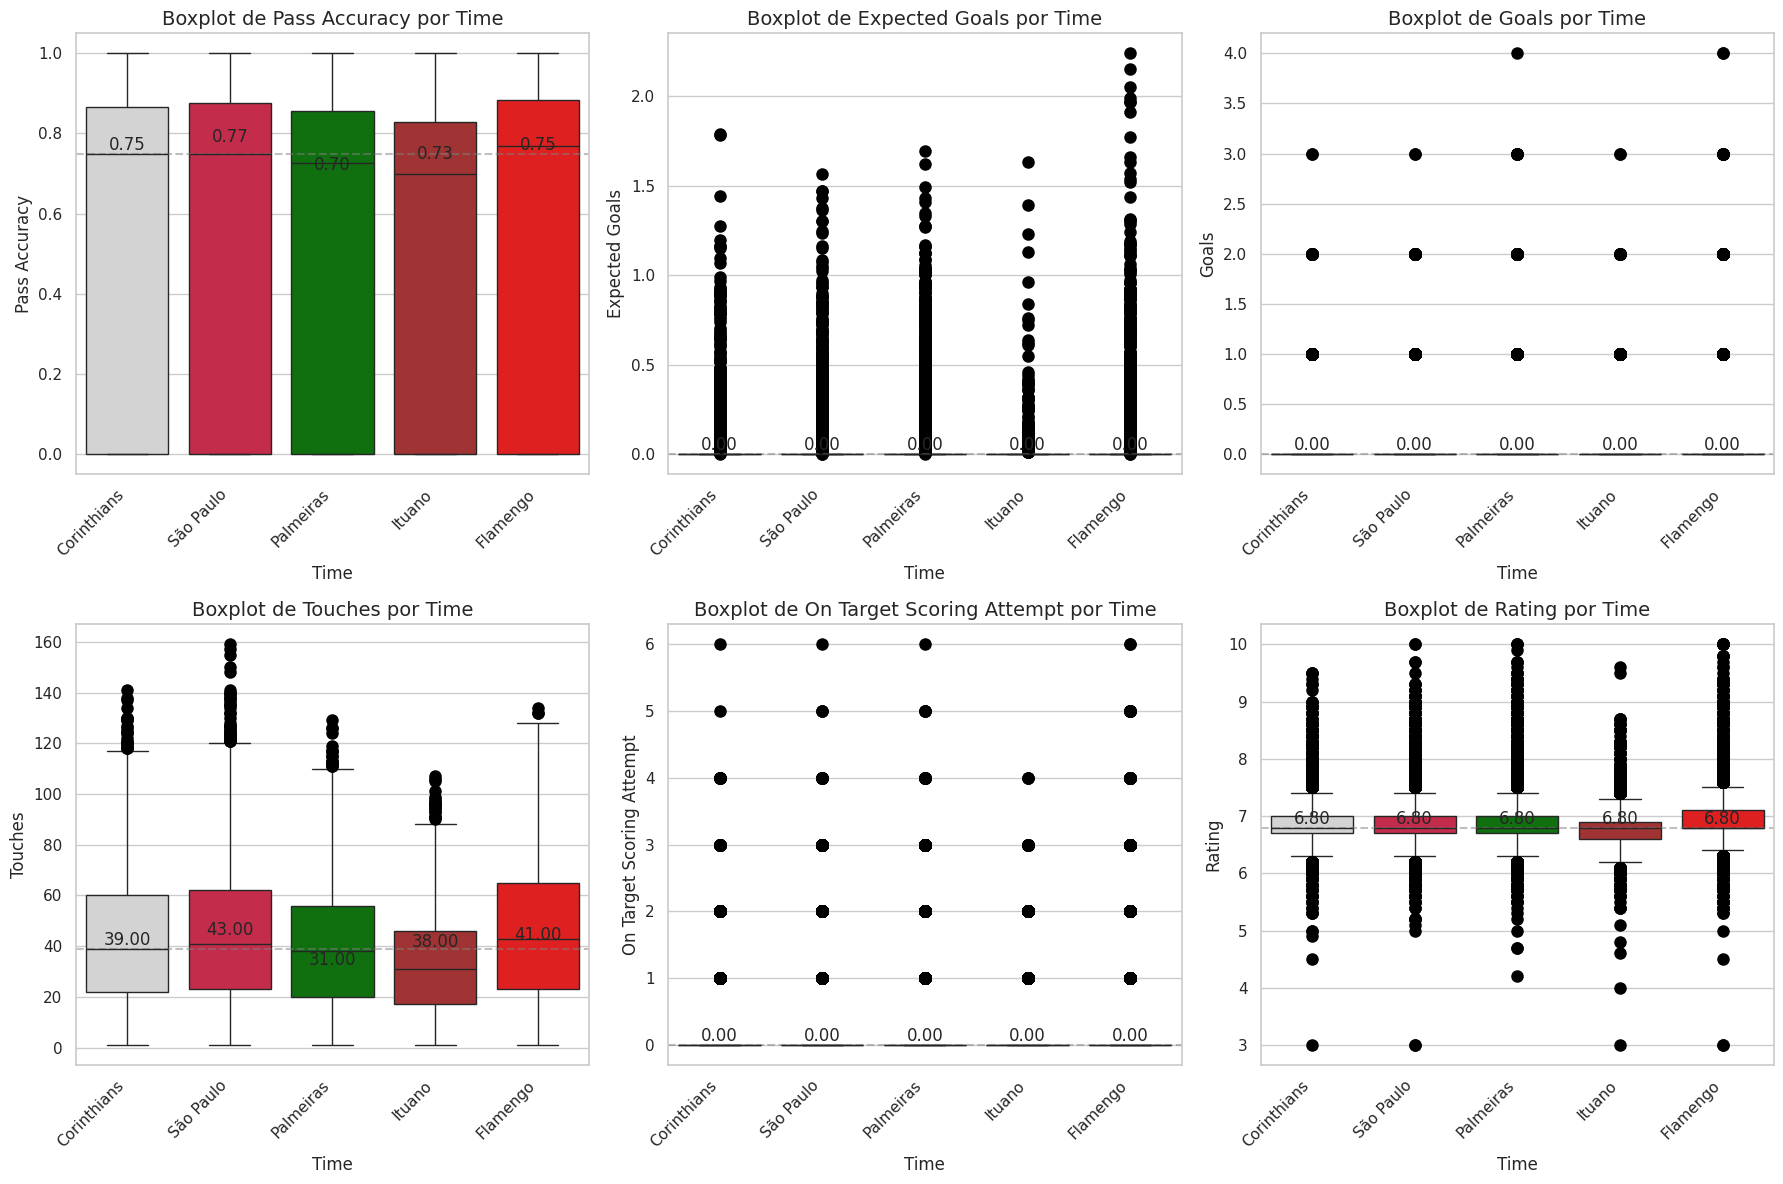

In [ ]:
plt.figure(figsize=(18, 12))
for i, metric in enumerate(key_metrics, 1):
    plt.subplot(2, 3, i)
    ax = sns.boxplot(x='target_team', y=metric, data=df, palette=team_colors, flierprops=dict(marker='o', markersize=8, markerfacecolor='black', markeredgecolor='black'))
    plt.title(f'Boxplot de {metric.replace("_", " ").title()} por Time')
    plt.xlabel('Time')
    plt.ylabel(metric.replace("_", " ").title())
    plt.xticks(rotation=45, ha='right')
    # Adicionar mediana como texto
    medians = df.groupby('target_team')[metric].median()
    for j, team in enumerate(medians.index):
        plt.text(j, medians[team], f'{medians[team]:.2f}', ha='center', va='bottom')
    # Linha de referência (mediana geral)
    plt.axhline(df[metric].median(), color='gray', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **Pass Accurac**

**Distribuição:** As medianas variam de 0.73 (Ituano) a 0.77 (Flamengo), com IQRs consistentes entre 0.70 e 0.88, indicando que a precisão de passes entre jogadores que realizam passes está geralmente entre 70% e 88%. Palmeiras (mediana 0.76) e Flamengo (0.77) apresentam as medianas mais altas, sugerindo maior consistência entre seus jogadores titulares.

**Outliers:** Há uma presença notável de outliers próximos a 0.00, especialmente em Corinthians e Ituano, refletindo jogadores com poucos ou nenhum passe (e.g., substitutos ou goleiros). Isso sugere que a amostra inclui uma proporção significativa de jogadores não envolvidos diretamente na posse.

A uniformidade nas medianas e IQRs indica que a precisão de passes não é um diferencial marcante entre os times, mas Flamengo e Palmeiras se destacam ligeiramente, possivelmente devido a uma maior participação de meio-campistas e atacantes de alto nível.

### **Expected Goals**

**Distribuição:** Todas as medianas são 0.00, com IQRs igualmente nulos, destacando que a maioria dos jogadores não gera chances de gol em uma partida típica. No entanto, outliers são significativos, com Flamengo atingindo até 2.24 e Palmeiras até 1.69, enquanto Ituano tem o menor máximo (1.63).

**Outliers:** Flamengo e Palmeiras exibem o maior número de outliers, indicando uma maior capacidade de criar oportunidades de gol, provavelmente devido a atacantes eficazes. Corinthians e São Paulo têm outliers moderados (até 1.79 e 1.56, respectivamente), enquanto Ituano mostra menor variabilidade.

A concentração de outliers em Flamengo e Palmeiras sugere uma estratégia ofensiva mais agressiva, com dependência de poucos jogadores para gerar xG. A mediana 0.00 reforça que essas ações são raras, destacando a importância de analisar posições específicas.

### **Goals**

**Distribuição:** As medianas e IQRs são 0.00 para todos os times, refletindo a raridade de gols por jogador em uma partida. Outliers são mais pronunciados em Flamengo (até 4.0) e Palmeiras (até 3.5), com valores menores em Corinthians, São Paulo e Ituano (todos até 3.0).

**Outliers:** Flamengo e Palmeiras lideram em outliers, indicando maior eficiência na conversão de chances em gols, possivelmente em jogos dominantes ou goleadas. Ituano, com menos outliers, sugere um desempenho mais contido.

Os outliers em `Goals` são consistentes com os de `Expected Goals`, confirmando que Flamengo e Palmeiras têm maior capacidade ofensiva. A baixa mediana e IQR indicam que gols são eventos excepcionais, concentrados em poucos jogadores ou partidas atípicas.

### **Touches**

**Distribuição:** As medianas variam de 31.00 (Ituano) a 43.00 (Flamengo), com São Paulo (41.00) e Palmeiras (38.00) intermediários, e Corinthians (39.00) ligeiramente abaixo. Isso reflete diferentes estilos de posse de bola, com Flamengo e São Paulo destacando-se.

**Outliers:** Outliers atingem 140-160 toques, especialmente em São Paulo e Flamengo, sugerindo jogos com alta posse ou participação de meio-campistas. Ituano tem menos outliers, alinhado com sua menor mediana.

Flamengo e São Paulo dominam a posse, com maior envolvimento dos jogadores, enquanto Ituano adota um estilo mais direto ou defensivo. A variabilidade alta (que revela outliers) indica que alguns jogos ou jogadores influenciam significativamente os toques.

### **On Target Scoring Attempt**

**Distribuição:** Medianas são 0.00 para todos, com IQRs nulos, mostrando que finalizações no alvo são raras por jogador. Outliers chegam a 6.0 em Flamengo, Palmeiras, São Paulo e Corinthians, e 4.0 em Ituano.

**Outliers:** Flamengo e Palmeiras têm mais outliers, refletindo maior volume de finalizações precisas, enquanto Ituano apresenta menos, consistente com seu menor desempenho ofensivo.

A alta incidência de outliers em Flamengo e Palmeiras corrobora sua eficiência ofensiva, enquanto a mediana 0.00 sugere que essas ações dependem de atacantes específicos. A menor variabilidade em Ituano reforça seu foco defensivo.

### **Rating**

**Distribuição:** As medianas variam de 6.80 (Ituano) a 6.90 (Flamengo), com IQRs estreitos (~0.30), indicando desempenho individual consistente entre 6.5 e 7.0. Palmeiras (6.80) e São Paulo (6.90) estão no meio.

**Outliers:** Outliers altos (até 10.0 em Flamengo e Palmeiras, 9.0 em outros) refletem atuações excepcionais, com Flamengo e Palmeiras liderando em frequência.

O `Rating` mostra estabilidade geral, com Flamengo e Palmeiras destacando-se em performances excepcionais. A pequena variação sugere que o desempenho individual é menos variável que as métricas ofensivas.

## **Padrões Gerais e Implicações**

**Flamengo e Palmeiras são times se destacam por maior número de outliers** em `Expected Goals`, `Goals` e `On Target Scoring Attempt`, indicando uma abordagem ofensiva mais agressiva e eficaz. Suas medianas em `Touches` (43.00 e 38.00) sugerem controle de posse, apoiado por elencos de alto nível.

**São Paulo e Corinthians apresentam desempenho intermediário**, com São Paulo liderando em `Touches` (41.00) e Corinthians em estabilidade (mediana de `Rating` 6.80). Outliers moderados sugerem competitividade, mas menor eficiência ofensiva.

**Ituano conta com medianas mais baixas** (`Touches` 31.00, `Rating` 6.80) e menos outliers, reflete um estilo mais contido, possivelmente devido a recursos limitados ou foco defensivo.

## **Correlações**

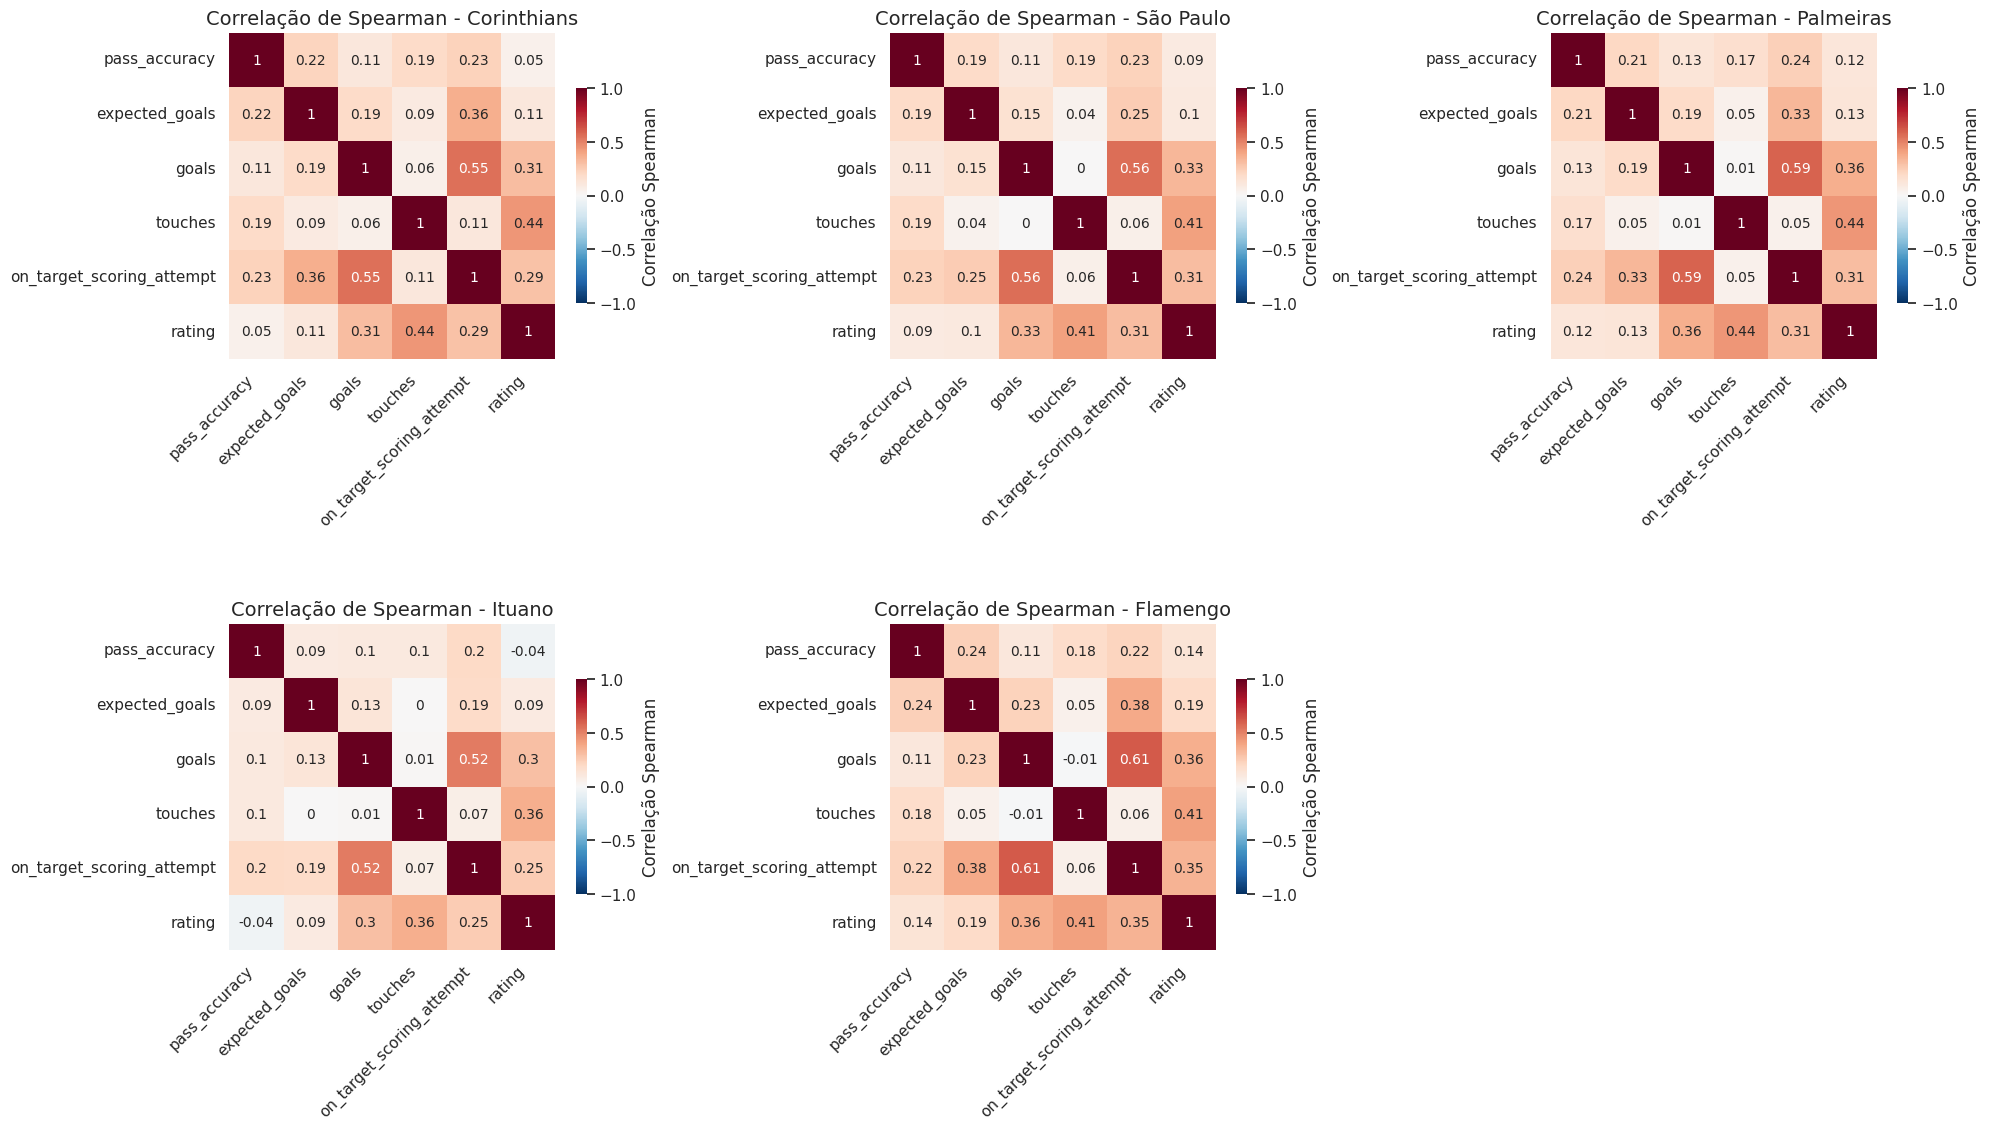

In [ ]:
plt.figure(figsize=(20, 12))
for idx, team in enumerate(teams):
    plt.subplot(2, 3, idx + 1)
    team_df = df[df['target_team'] == team][key_metrics]
    corr_matrix = team_df.corr(method='spearman').round(2)
    sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, center=0, square=True,
                cbar_kws={'shrink': .5, 'label': 'Correlação Spearman'},
                annot_kws={"size": 10})
    plt.title(f'Correlação de Spearman - {team}')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

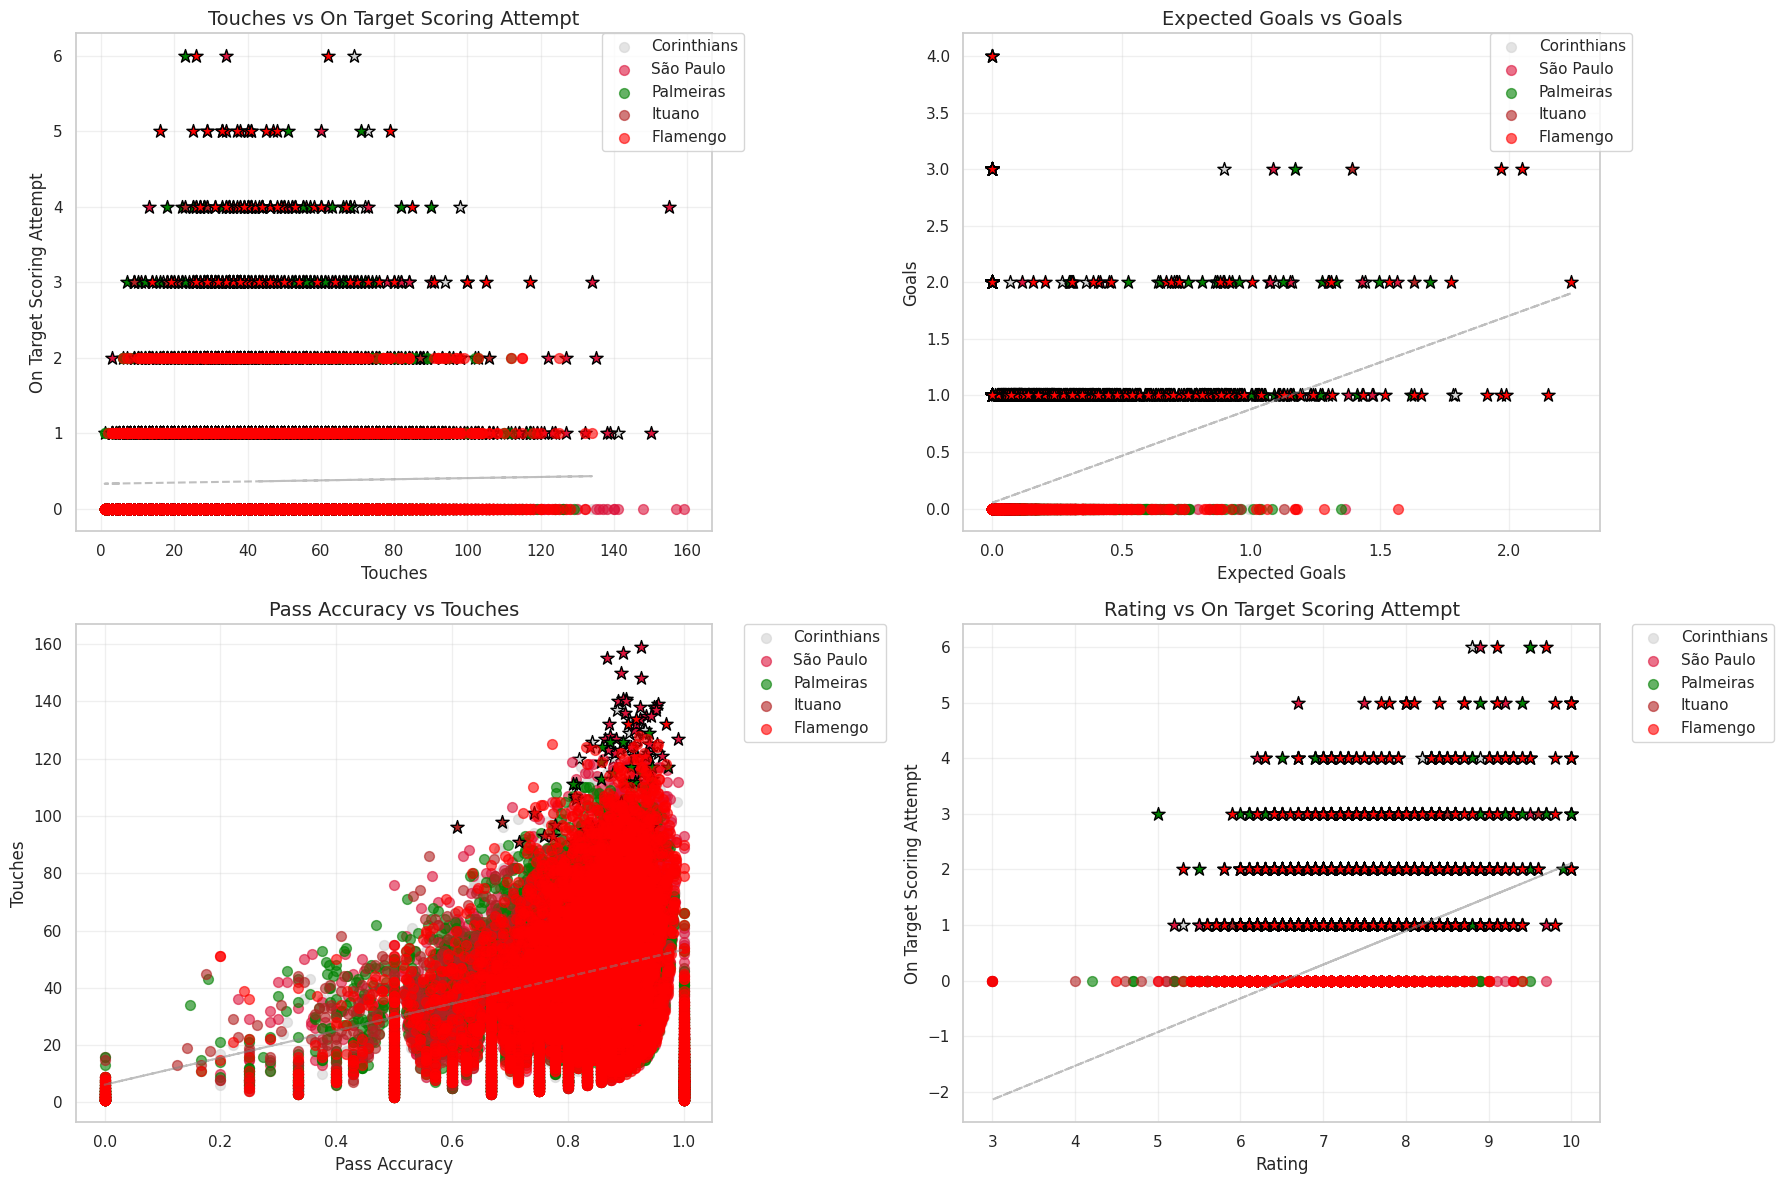

In [ ]:
pairs = [
    ('touches', 'on_target_scoring_attempt'),
    ('expected_goals', 'goals'),
    ('pass_accuracy', 'touches'),
    ('rating', 'on_target_scoring_attempt')
]

plt.figure(figsize=(18, 12))
for i, (x_var, y_var) in enumerate(pairs, 1):
    plt.subplot(2, 2, i)
    for team in teams:
        team_df = df[df['target_team'] == team]
        # Remover NaN e inf para este par
        team_df = team_df[[x_var, y_var]].replace([np.inf, -np.inf], np.nan).dropna()
        # Identificar outliers usando IQR
        Q1 = team_df[y_var].quantile(0.25)
        Q3 = team_df[y_var].quantile(0.75)
        IQR = Q3 - Q1
        outliers = (team_df[y_var] < (Q1 - 1.5 * IQR)) | (team_df[y_var] > (Q3 + 1.5 * IQR))
        # Plotar pontos normais e outliers
        plt.scatter(team_df[~outliers][x_var], team_df[~outliers][y_var], label=team, color=team_colors[team], alpha=0.6, s=50)
        plt.scatter(team_df[outliers][x_var], team_df[outliers][y_var], marker='*', color=team_colors[team], s=100, edgecolor='black')
    plt.title(f'{x_var.replace("_", " ").title()} vs {y_var.replace("_", " ").title()}')
    plt.xlabel(x_var.replace("_", " ").title())
    plt.ylabel(y_var.replace("_", " ").title())
    plt.grid(True, alpha=0.3)
    plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    # Adicionar linha de tendência com verificação
    team_df_clean = team_df[[x_var, y_var]].dropna()
    if len(team_df_clean) > 1 and len(team_df_clean[x_var].unique()) > 1 and len(team_df_clean[y_var].unique()) > 1:
        try:
            coef = np.polyfit(team_df_clean[x_var], team_df_clean[y_var], 1)
            poly1d_fn = np.poly1d(coef)
            plt.plot(team_df_clean[x_var], poly1d_fn(team_df_clean[x_var]), '--', color='gray', alpha=0.5)
        except np.linalg.LinAlgError:
            print(f"Não foi possível ajustar uma linha de tendência para {x_var} vs {y_var} devido a dados insuficientes ou colineares.")
plt.tight_layout()
plt.show()

Para compreender melhor os fatores associados ao desempenho de jogadores de diferentes clubes brasileiros, foram analisadas as correlações de Spearman entre variáveis técnicas e físicas.

Os mapas de calor mostram as correlações de Spearman entre variáveis para os clubes Corinthians, São Paulo, Palmeiras, Ituano e Flamengo. Em geral, observa-se:

* `On Target Scoring Attempt` possui correlação consistente e moderadamente forte com o número de gols em todos os times, especialmente no Flamengo (0.61), indicando que a capacidade de finalizar com precisão está fortemente associada à conversão de gols.

* O `rating` dos jogadores está mais correlacionado com as ações ofensivas (como gols e finalizações no alvo) do que com variáveis como precisão de passe ou toques.

* A variável `touches` apresenta baixa ou nula correlação com gols em praticamente todos os clubes, sugerindo que quantidade de posse ou participação no jogo nem sempre resulta em impacto direto no placar.

### Os gráficos de dispersão reforçam e detalham essas correlações.

**Touches vs. On Target Scoring Attempt**: Apesar da grande variação no número de toques, observa-se uma tendência de que jogadores com maior número de finalizações no alvo não necessariamente estão entre os que mais tocam na bola, indicando perfis de jogadores diferentes (meio-campistas vs atacantes).

**Expected Goals vs Goals**: Existe um alinhamento moderado entre os gols esperados e os gols efetivamente marcados, com variações por jogador. Isso sugere que alguns jogadores são mais eficazes que o esperado, enquanto outros finalizam abaixo do potencial.

**Pass Accuracy vs Touches**: Uma correlação positiva é observada, especialmente no Flamengo, onde jogadores com mais toques tendem a ter maior precisão de passe. Isso pode indicar uma construção de jogadas mais refinada e controle de posse mais técnico.

**Rating vs On Target Scoring Attempt**: A avaliação do jogador aumenta conforme o número de finalizações no alvo cresce, especialmente em jogadores ofensivos. Isso destaca o impacto ofensivo como fator determinante no índice de performance.

## **Análise probabilística**

Utilizar a distribuição binomial para estimar a probabilidade de um jogador (ou time) marcar um número específico de gols em uma sequência de finalizações no alvo, com base em sua taxa de conversão histórica oferece uma previsão probabilística do desempenho ofensivo futuro.

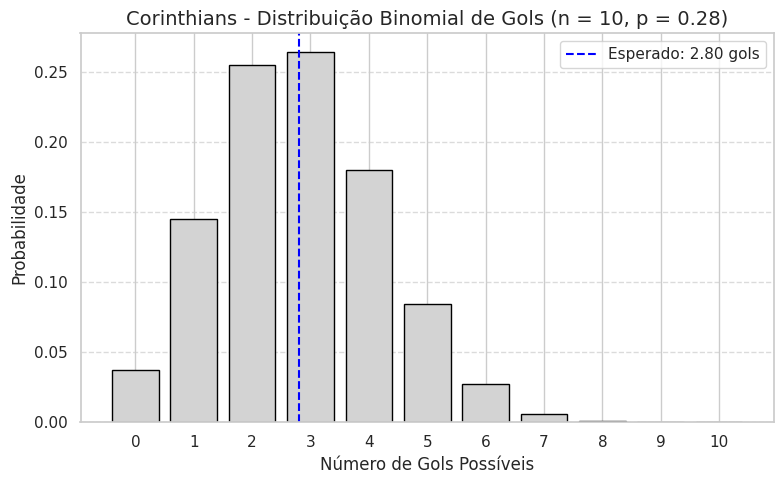

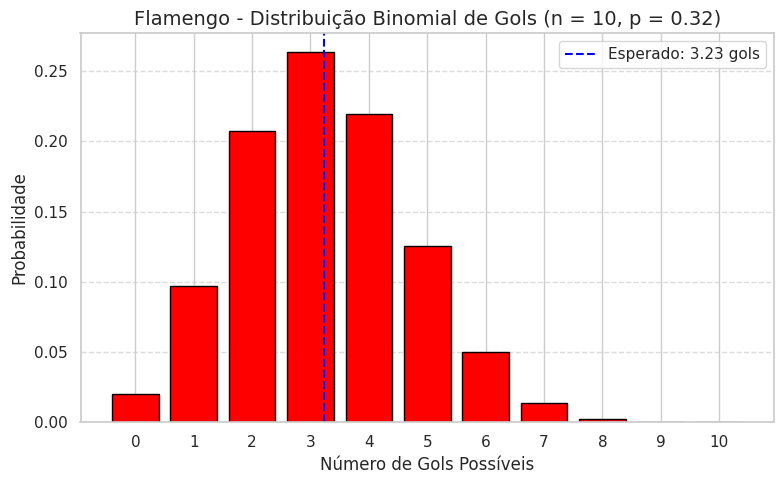

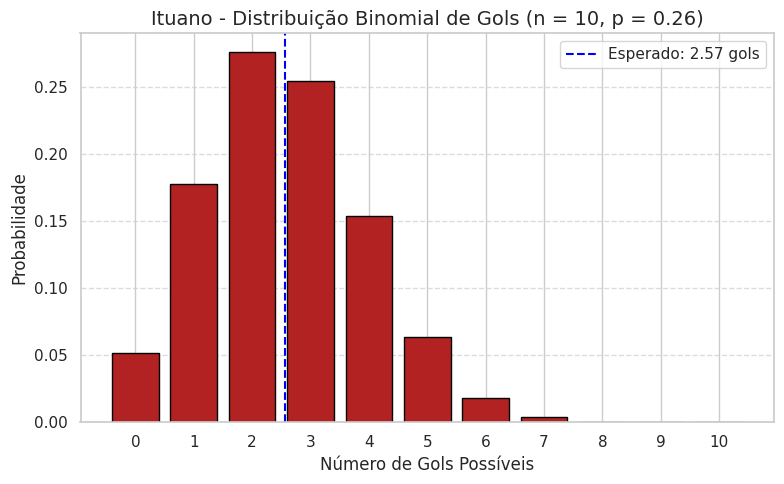

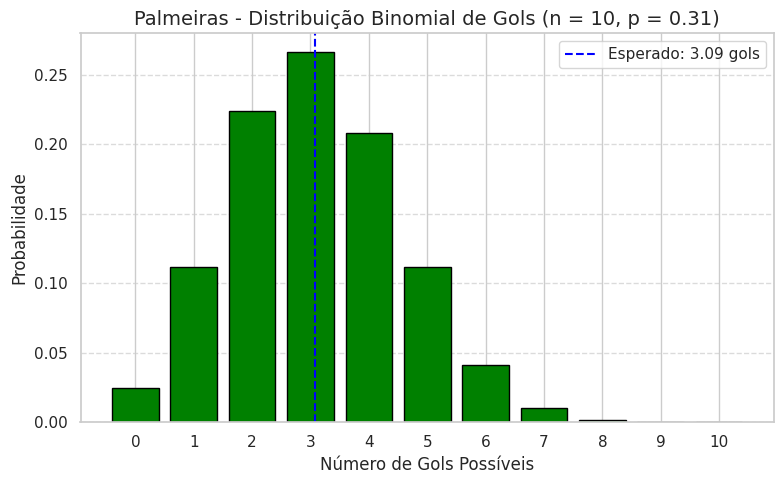

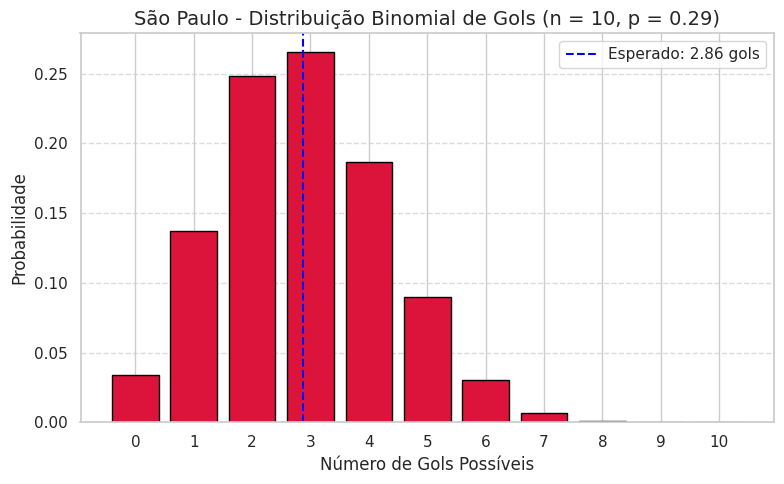

In [ ]:
from scipy.stats import binom

grouped = df.groupby('target_team').agg({
    'goals': 'sum',
    'on_target_scoring_attempt': 'sum'
}).reset_index()

# Calcular taxa de conversão p por time
grouped['conversion_rate'] = grouped['goals'] / grouped['on_target_scoring_attempt']

# Número de finalizações futuras previstas
n_future = 10

# Gerar gráficos para cada time
for index, row in grouped.iterrows():
    team = row['target_team']
    p = row['conversion_rate']

    if pd.isna(p) or p == 0:
        continue  # pula se não houver dados confiáveis

    x = np.arange(0, n_future + 1)
    probs = binom.pmf(x, n_future, p)

    # Gráfico
    plt.figure(figsize=(8, 5))
    plt.bar(x, probs, color=team_colors[team], edgecolor='black')
    plt.axvline(n_future * p, color='blue', linestyle='--', label=f'Esperado: {n_future * p:.2f} gols')
    plt.title(f'{team} - Distribuição Binomial de Gols (n = {n_future}, p = {p:.2f})')
    plt.xlabel('Número de Gols Possíveis')
    plt.ylabel('Probabilidade')
    plt.xticks(x)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

A partir dos gráficos, é possível concluir que o **Flamengo apresenta a maior probabilidade de marcar entre 3 a 4 gols**, com uma média esperada de aproximadamente 3,23 gols por jogo. Isso o coloca como um dos ataques mais eficientes entre os analisados.

**Palmeiras e São Paulo têm desempenhos similares**, com médias de gols esperados de 3,09 e 2,86, respectivamente. Ambos têm maior concentração de probabilidade entre 2 e 4 gols, sugerindo consistência ofensiva.

**Corinthians possui uma média levemente inferior** (2,80 gols esperados), com distribuição ligeiramente mais espalhada entre 1 a 4 gols, indicando um ataque um pouco menos previsível, mas ainda competitivo.

**Ituano**, com média de 2,57 gols esperados, **é o time com menor eficiência de conversão entre os analisados**, concentrando maior probabilidade em 2 a 3 gols. Isso pode refletir em maior necessidade de ajuste ofensivo.

## **Conclusões gerais das análises**

As análises descritivas e os boxplots realizados confirmam a tese de que os times brasileiros analisados — Corinthians, São Paulo, Palmeiras, Ituano e Flamengo — apresentam diferenças significativas em seus estilos de jogo e desempenho ofensivo, refletidas em métricas como precisão de passes, criação de chances, eficiência na finalização, posse de bola e desempenho individual dos jogadores. Esses resultados oferecem uma visão detalhada das dinâmicas táticas e das capacidades individuais de cada equipe, com implicações importantes para estratégias de jogo e análises futuras.

Flamengo e Palmeiras emergem como os mais ofensivos e possessivos, com métricas que refletem maior criação e conversão de chances, além de controle de posse, provavelmente devido a elencos mais qualificados e estratégias agressivas. São Paulo também prioriza a posse, mas com menor eficiência ofensiva, enquanto Corinthians exibe um equilíbrio entre posse e estabilidade, sem alcançar a mesma eficácia ofensiva de Flamengo e Palmeiras. Ituano, por sua vez, adota um estilo mais defensivo e reativo, com menos posse e menor volume ofensivo, o que pode ser atribuído a limitações de recursos e elenco.

As métricas de desempenho individual (`rating`) mostram consistência geral, mas os outliers indicam que Flamengo e Palmeiras têm mais jogadores capazes de atuações excepcionais, o que contribui para seu sucesso ofensivo. A precisão de passes, embora uniforme, não é um diferencial tático significativo, sugerindo que o sucesso ofensivo depende mais da criação de chances e eficiência na finalização, áreas onde Flamengo e Palmeiras se destacam.

Os gráficos de correlação revelam que o desempenho ofensivo (gols, finalizações no alvo) é o fator com maior impacto no `rating` dos jogadores, mais do que aspectos como precisão de passe ou volume de toques. Essa tendência é mais pronunciada em clubes com perfil ofensivo mais claro, como o Flamengo. Já clubes como o Ituano e o São Paulo apresentam correlações mais modestas, possivelmente por estratégias de jogo mais defensivas ou equilibradas.

A análise probabilística com base na distribuição binomial revelou diferenças significativas na eficiência ofensiva entre os times estudados. Flamengo e Palmeiras destacaram-se com as maiores médias de gols esperados por tentativa, indicando maior potencial de conversão. São Paulo e Corinthians apresentaram desempenhos consistentes, embora com leve variação. Já o Ituano obteve a menor média, sugerindo oportunidades de melhoria no setor ofensivo. Esses resultados reforçam a importância da análise estatística para embasar estratégias e otimizar o desempenho em campo.